In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from wordcloud import WordCloud

In [3]:
cf.go_offline()

In [4]:
train = pd.read_json('train.json').set_index('id')

In [5]:
train.head(5)

,cuisine,ingredients
id,,
10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
22213,indian,"[water, vegetable oil, wheat, salt]"
13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39774 entries, 10259 to 2362
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cuisine      39774 non-null  object
 1   ingredients  39774 non-null  object
dtypes: object(2)
memory usage: 932.2+ KB


In [7]:
all_ingredients = []
for i in train['ingredients']:
    for x in i:
        all_ingredients.append(x)

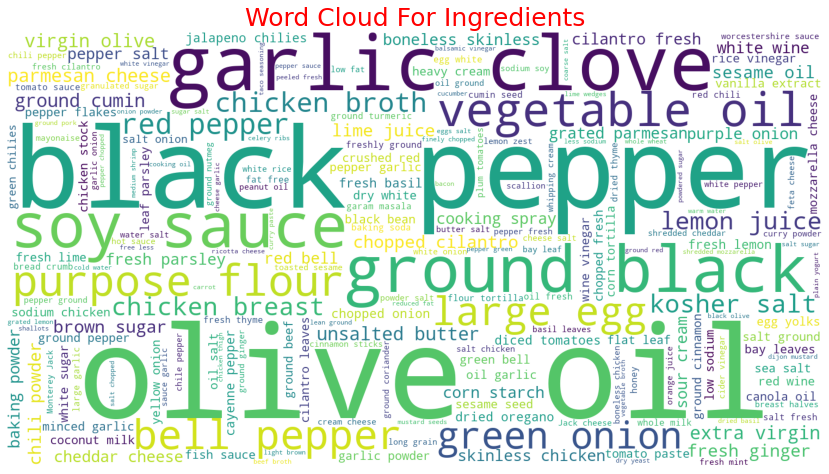

In [8]:
wordcloud = WordCloud(background_color='white', height=800, width=1500, max_words=200).generate(' '.join(all_ingredients))
plt.imshow(wordcloud)
fig = plt.gcf()
fig.set_size_inches(18,8)
plt.axis('off')
plt.title('Word Cloud For Ingredients', size=25, color='r');

In [9]:
all_unique_ingredients = list(set(all_ingredients)) # list all the unique ingredients

In [11]:
def unique_ingredients(cuisine, number, all_unique_ingredients):
    ingredient_from_other=[]
    for i in train[train['cuisine'] != cuisine]['ingredients']:
        for x in i:
            ingredient_from_other.append(x)
    ingredient_from_other = list(set(ingredient_from_other))
    
    unique = [x for x in all_unique_ingredients if x not in ingredient_from_other]
    
    count = Counter() # you can also use defaultdict method
    for i in train[train['cuisine'] == cuisine]['ingredients']:
        for x in i:
            count[x] +=1
    unique = list(unique)
    for j in list(count):
        if j not in unique:
            del count[j]
    cuisine_specific = pd.DataFrame(count.most_common(number), columns = ['ingredients', 'count'])
    return cuisine_specific

In [19]:
unique_ingredients('chinese', 10, all_unique_ingredients)

,ingredients,count
0,fermented black beans,36
1,ground sichuan pepper,17
2,dried black mushrooms,9
3,maltose,9
4,shaoxing,9
5,black rice vinegar,9
6,char siu,8
7,Chinese rice vinegar,8
8,lily buds,8
9,chenpi,7


In [20]:
def plot_unique_ingredients(cuisine, number, all_unique_ingredients):
    ingredient_from_other=[]
    for i in train[train['cuisine'] != cuisine]['ingredients']:
        for x in i:
            ingredient_from_other.append(x)
    ingredient_from_other = list(set(ingredient_from_other))
    
    unique = [x for x in all_unique_ingredients if x not in ingredient_from_other]
    
    count = Counter() # you can also use defaultdict method
    for i in train[train['cuisine'] == cuisine]['ingredients']:
        for x in i:
            count[x] +=1
    unique = list(unique)
    for j in list(count):
        if j not in unique:
            del count[j]
    cuisine_specific = pd.DataFrame(count.most_common(number), columns = ['ingredients', 'count'])
    cuisine_specific.set_index('ingredients')[::-1].iplot(kind='barh')

In [22]:
plot_unique_ingredients('mexican', 10, all_unique_ingredients)

In [23]:
plot_unique_ingredients('greek', 10, all_unique_ingredients)

In [24]:
plot_unique_ingredients('korean', 10, all_unique_ingredients)

### most important ingredients in each cuisine 

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
feature = []
for i in train['ingredients']:
    feature.append(i)

In [44]:
len(feature)

39774

In [27]:
ingredients = []
for i in train['ingredients']:
    for x in i:
        ingredients.append(x)

In [28]:
tfidf = TfidfVectorizer(vocabulary= list(set([str(i).lower() for i in ingredients])), max_df=0.99, norm='l2', ngram_range=(1,4))
Xtrain = tfidf.fit_transform([str(i) for i in feature])

In [47]:
feature_names = tfidf.get_feature_names_out()

In [51]:
feature_names.shape

(6703,)

In [49]:
Xtrain.shape

(39774, 6703)

In [84]:
def most_important_ingredients(data, cuisine, number):
    index = np.where(train['cuisine'] == cuisine)
    target_data = data[index].toarray()
    tfidf_mean=np.nanmean(target_data, axis=0)
    top_index = np.argsort(tfidf_mean)[::-1][:number]
    top_feature = [(feature_names[i], tfidf_mean[i]) for i in top_index]
    df = pd.DataFrame(top_feature, columns=['feature', 'Tfidf'])
    return df 

In [85]:
most_important_ingredients(Xtrain, 'chinese', 10)

,feature,Tfidf
0,sauce,0.133279
1,soy,0.118184
2,soy sauce,0.117952
3,sesame,0.088572
4,oil,0.082815
5,ginger,0.074836
6,sesame oil,0.074297
7,starch,0.062411
8,rice,0.061986
9,corn starch,0.060654


In [80]:
def plot_most_important_ingredients(data, country, number):
    index = np.where(train['cuisine'] == country)
    target_data = data[index].toarray()
    tfidf_mean=np.nanmean(target_data, axis=0)
    top_index = np.argsort(tfidf_mean)[::-1][:number]
    top_feature = [(feature_names[i], tfidf_mean[i]) for i in top_index]
    df = pd.DataFrame(top_feature, columns=['feature', 'Tfidf'])
    df.set_index('feature')[::-1].iplot(kind='barh')      

In [81]:
plot_most_important_ingredients(Xtrain, 'chinese', 10)

In [86]:
plot_most_important_ingredients(Xtrain, 'italian', 10)

In [87]:
plot_most_important_ingredients(Xtrain, 'mexican', 10)